# Launching fiber modes

In [104]:
import sys
%load_ext autoreload
%autoreload 2
import meep as mp
import numpy as np
import h5py
import cmasher as cm
from matplotlib import pyplot as plt
import wavesight as ws
import time
import cmasher as cm
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import pickle

Using MPI version 4.0, 1 processes


## ## fiber_fan (data analysis)

In [25]:
import pickle
import numpy as np
from matplotlib import pyplot as plt

In [96]:
pkls=["sim-1695930177.pkl","sim-1695927983.pkl","sim-1695928258.pkl","sim-1695928549.pkl","sim-1695928832.pkl","sim-1695929100.pkl","sim-1695929365.pkl","sim-1695929631.pkl","sim-1695929904.pkl","sim-1695920308.pkl","sim-1695920534.pkl","sim-1695920756.pkl","sim-1695920978.pkl","sim-1695921204.pkl","sim-1695921465.pkl","sim-1695921726.pkl","sim-1695921990.pkl","sim-1695922254.pkl","sim-1695922513.pkl","sim-1695922780.pkl","sim-1695923051.pkl","sim-1695923313.pkl","sim-1695923575.pkl","sim-1695923833.pkl","sim-1695924097.pkl","sim-1695924355.pkl","sim-1695924615.pkl","sim-1695925197.pkl","sim-1695925778.pkl","sim-1695926054.pkl","sim-1695926319.pkl","sim-1695926591.pkl","sim-1695926866.pkl","sim-1695927153.pkl","sim-1695927432.pkl","sim-1695927715.pkl"]
pkls=sorted(pkls)

In [128]:
for slice in ['xz','yz','xy']:
    print(slice)
    cake = []
    info = []
    for pickl in pkls:
        mode_sol = pickle.load(open(pickl,'rb'))
        xz = mode_sol['monitor_field_slices'][slice]
        infum = (mode_sol['m'], mode_sol['modeType'], mode_sol['kz'], mode_sol['γ'], mode_sol['β'])
        info.append(infum)
        cake.append(xz[:,:,:,:,-1])
    info = np.array(info)
    cake = np.array(cake)
    h5_fname = f'{slice}-slices-compendium.h5'
    print(h5_fname)
    if slice in ['xz','xy']:
        xCoords = mode_sol['coords']['xCoordsMon'+slice]
        yCoords = mode_sol['coords']['yCoordsMon'+slice]
        zCoords = mode_sol['coords']['zCoordsMon'+slice]
    else:
        yCoords = mode_sol['coords']['xCoordsMon'+'xz']
        xCoords = mode_sol['coords']['yCoordsMon'+'xz']
        zCoords = mode_sol['coords']['zCoordsMon'+'xz']
    geomKeys = ['coreRadius','nCore','nCladding']
    geomParams = [mode_sol[key] for key in geomKeys]
    with h5py.File(h5_fname,'w') as h5_file:
        h5_file.create_dataset('/re', data = np.real(cake))
        h5_file.create_dataset('/im', data = np.imag(cake))
        h5_file.create_dataset('/m', data = list(map(int,info[:,0])))
        h5_file.create_dataset('/kz', data = list(map(float,info[:,2])))
        h5_file.create_dataset('/beta', data = list(map(float,info[:,4])))
        h5_file.create_dataset('/xCoords', data = xCoords)
        h5_file.create_dataset('/yCoords', data = yCoords)
        h5_file.create_dataset('/zCoords', data = zCoords)
        h5_file.create_dataset('/geomParams', data = np.array(geomParams))
        h5_file.attrs['fieldTypes'] = ','.join(list(info[:,1]))

xz
xz-slices-compendium.h5
yz
yz-slices-compendium.h5
xy
xy-slices-compendium.h5


In [127]:
mode_sol['coords'].keys()

dict_keys(['xCoords', 'yCoords', 'zCoords', 'xCoordsMonxy', 'yCoordsMonxy', 'zCoordsMonxy', 'xCoordsMonxz', 'yCoordsMonxz', 'zCoordsMonxz'])

In [124]:
mode_sol['full_simulation_width_with_PML']

10.195327601316748

## ## A few-mode fiber refraction into free space

In [105]:
def approx_time(sim_cell, spatial_resolution, run_time, kappa=2.2e-6):
    rtime = (kappa * sim_cell.x * sim_cell.y * sim_cell.z
             * run_time * spatial_resolution**3)
    return rtime

In [108]:
fiber_spec = {'nCladding': 1.2,
              'nCore': 1.5,
              'coreRadius': 0.8,
              'grid_divider': 4,
              'nUpper': 1.0,
              'λFree': 0.532}
fiber_sol = ws.multisolver(fiber_spec,
                           solve_modes = 'all',
                           drawPlots=False,
                           verbose=True)

Approx number of complex HE modes:  13
Approx number of TE modes:  4
Approx number of TM modes:  4
Approx number of total modes:  36
Approx Max n for HE modes:  5
Calculating TM(0,n) propagation constants ...
Calculating TE(0,n) propagation constants ...
Calculating HE(m,n) propagation constants ...
m=7
HE modes = 32
TE modes = 2
TM modes = 2
TOTAL modes = 36
FROM_Vnum = 36


In [109]:
fiber_sol = ws.calculate_numerical_basis(fiber_sol, verbose=False)
eigenbasis = fiber_sol['eigenbasis']
a, b, Δs, xrange, yrange, ρrange, φrange, Xg, Yg, ρg, φg, nxy, crossMask, numSamples = fiber_sol['coord_layout']

/Users/juan/ZiaLab/Codebase/wavesight/fieldgenesis.py:766: RuntimeWarning: invalid value encountered in subtract
  return -0.5*(a*np.sqrt(-kz**2 + kFree**2*nCore**2)*(special.kn(-1 + m,(np.sqrt(a**2*(kz**2 - kFree**2*nCladding**2))*ρ)/a)*(-1 - (2*kFree**2*m*(nCladding**2 - nCore**2)*special.jv(m,a*np.sqrt(-kz**2 + kFree**2*nCore**2))*special.kn(m,np.sqrt(a**2*(kz**2 - kFree**2*nCladding**2))))/(a*(kz**2 - kFree**2*nCladding**2)*np.sqrt(-kz**2 + kFree**2*nCore**2)*(special.jv(-1 + m,a*np.sqrt(-kz**2 + kFree**2*nCore**2)) - special.jv(1 + m,a*np.sqrt(-kz**2 + kFree**2*nCore**2)))*special.kn(m,np.sqrt(a**2*(kz**2 - kFree**2*nCladding**2))) + np.sqrt(a**2*(kz**2 - kFree**2*nCladding**2))*(kz**2 - kFree**2*nCore**2)*special.jv(m,a*np.sqrt(-kz**2 + kFree**2*nCore**2))*(special.kn(-1 + m,np.sqrt(a**2*(kz**2 - kFree**2*nCladding**2))) + special.kn(1 + m,np.sqrt(a**2*(kz**2 - kFree**2*nCladding**2)))))) - (1 - (2*kFree**2*m*(nCladding**2 - nCore**2)*special.jv(m,a*np.sqrt(-kz**2 + kFree**2*nCor

In [110]:
most_idx = np.argmin(np.array(list(map(lambda x: x[4],fiber_sol['eigenbasis_nums']))))

In [115]:
show_plot = False
send_to_slack = True
nUpper = fiber_sol['nUpper']
for mode_idx in range(len(eigenbasis)):
    if mode_idx == 1:
        break
    sample_resolution = 10
    MEEP_resolution  = 20
    min_cycles      = 12
    sim_height_fun = lambda λFree, pml_thickness: (10 * λFree + 2 * pml_thickness)
    sim_id        = str(int(time.time()))
    grab_fields  = True # whether to import the h5 files that contain the monotired fields
    slack_channel = 'nvs_and_metalenses'
    num_time_slices = 150 # how many time samples of fields

    if send_to_slack:
        slack_thread = ws.post_message_to_slack("%s - MEEP simulation - %s" % (mode_idx, sim_id), slack_channel=slack_channel)
        thread_ts = slack_thread['ts']

    def run_time_fun(fiber_height, nCore, min_cycles, base_period):
        return 0.75 * fiber_height * nCore

    h_xy_slices_fname = 'h-field-xy-slices-' + sim_id
    e_xy_slices_fname = 'e-field-xy-slices-' + sim_id
    h_xz_slices_fname = 'h-field-xz-slices-' + sim_id
    e_xz_slices_fname = 'e-field-xz-slices-' + sim_id

    mode_sol = {'fiber_sol': fiber_sol,
                'mode_idx': mode_idx,
                'nCore': fiber_sol['nCore'],
                'nCladding': fiber_sol['nCladding'],
                'coreRadius': fiber_sol['coreRadius'],
                'kFree': fiber_sol['kFree'],
                'sample_resolution': sample_resolution,
                'MEEP_resolution': MEEP_resolution,
                'num_time_slices': num_time_slices
                }
    
    mode_sol['h_xy_slices_fname_h5'] = h_xy_slices_fname + '.h5'
    mode_sol['e_xy_slices_fname_h5'] = e_xy_slices_fname + '.h5'
    mode_sol['h_xz_slices_fname_h5'] = h_xz_slices_fname + '.h5'
    mode_sol['e_xz_slices_fname_h5'] = e_xz_slices_fname + '.h5'

    coord_layout = fiber_sol['coord_layout']
    (coreRadius, simWidth, Δs, xrange, yrange, 
     ρrange, φrange, Xg, Yg, ρg, φg, nxy, 
     crossMask, numSamples) = coord_layout
    mode_sol['simWidth'] = simWidth
    eigenbasis = fiber_sol['eigenbasis']
    eigennums  = fiber_sol['eigenbasis_nums']
    mode_idx = mode_sol['mode_idx']
    amode = eigenbasis[mode_idx]
    mode_params = eigennums[mode_idx]
    (modType, parity, m, kzidx, kz, γ, β) = mode_params

    nCore = mode_sol['nCore']
    nCladding = mode_sol['nCladding']
    coreRadius = mode_sol['coreRadius']
    kFree = mode_sol['kFree']

    # calculate the field functions
    print("Calculating the field functions from the analytical solution ...")
    (Efuncs, Hfuncs) = ws.fieldGenerator(coreRadius, kFree, kz, m, nCladding, nCore, modType)
    (ECoreρ, ECoreϕ, ECorez, ECladdingρ, ECladdingϕ, ECladdingz) = Efuncs
    (HCoreρ, HCoreϕ, HCorez, HCladdingρ, HCladdingϕ, HCladdingz) = Hfuncs
    funPairs = (((ECoreρ, ECladdingρ), (HCoreρ, HCladdingρ)),
                ((ECoreϕ, ECladdingϕ), (HCoreϕ, HCladdingϕ)),
                ((ECorez, ECladdingz), (HCorez, HCladdingz)))

    # put them together as needed to be provided to the custom current builder in MEEP
    modeFuns = {}
    for funPair in funPairs:
        (ECoreρ, ECladdingρ), (HCoreρ, HCladdingρ) = funPair
        EfunVal = ECoreρ(np.pi/np.sqrt(2))
        HfunVal = HCoreρ(np.pi/np.sqrt(2))
        if EfunVal != 0 or HfunVal != 0:
            if EfunVal == 0:
                componentName = HCoreρ.__name__.split('_')[-1].replace('Core','')
                modeFuns[componentName] =  (HCoreρ, HCladdingρ)
            else:
                componentName = ECoreρ.__name__.split('_')[-1].replace('Core','')
                modeFuns[componentName] =  (ECoreρ, ECladdingρ)

    # calculate the radial profile of the fields

    field_profiles = {}
    for componentName, (coreFun, claddingFun) in modeFuns.items():
        Ecorevals = np.vectorize(coreFun)(ρrange)
        ECladdingvals = np.vectorize(claddingFun)(ρrange)
        ρmask = ρrange < coreRadius
        Ecorevals[~ρmask] = 0
        ECladdingvals[ρmask] = 0
        E_all = Ecorevals + ECladdingvals
        field_profiles[componentName] = E_all

    mode_sol['field_profiles'] = (ρrange, field_profiles)

    print("Calculating a sample of the generating effective currents ...")
    # calculate the generating currents
    Xg, Yg, electric_J, magnetic_K = ws.field_sampler(funPairs, simWidth,
                                                sample_resolution,
                                                m, parity,
                                                coreRadius,
                                                coord_sys = 'cartesian-cartesian',
                                                equiv_currents=True)

    mode_sol['sampled_electric_J'] = electric_J
    mode_sol['sampled_magnetic_K'] = magnetic_K
    mode_sol['sampled_Xg'] = Xg
    mode_sol['sampled_Yg'] = Yg

    print("Making a plot of the field profiles ...")
    # make a plot of the field profiles
    vrange = 0
    fig, ax = plt.subplots(figsize=(6,3))
    for componentName in field_profiles:
        E_all = field_profiles[componentName]
        if (E_all.dtype) == np.complex128:
            E_all = np.imag(E_all)
            componentName = 'Im(%s)' % componentName
        ax.plot(ρrange, E_all, label=componentName)
        vrange = max(vrange, np.max(np.abs(E_all)))
    ax.plot([coreRadius]*2,[-vrange,vrange],'o--',color='w',ms=2,lw=0.5)
    plt.legend()
    ax.set_xlabel('x/μm')
    ax.set_ylabel('field')
    if send_to_slack:
        ws.send_fig_to_slack(fig, slack_channel, "Field profiles", 'field-profiles-%s.png' % sim_id, thread_ts = thread_ts)
    if show_plot:
        plt.show()
    else:
        plt.close()

    print("Making a streamplot of the generating currents ...")
    streamArrayK = np.real(magnetic_K)
    streamArrayJ = np.real(electric_J)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.streamplot(Xg, Yg, streamArrayK[0],streamArrayK[1], density=1., color='b')
    ax.streamplot(Xg, Yg, streamArrayJ[0],streamArrayJ[1], density=1., color='r')
    coreBoundary = plt.Circle((0,0), coreRadius, color='w', fill=False)
    ax.add_patch(coreBoundary)
    ax.set_aspect('equal')
    ax.set_xlabel('x/μm')
    ax.set_ylabel('y/μm')
    ax.set_title('Equivalent currents.')
    if send_to_slack:
        ws.send_fig_to_slack(fig, slack_channel, "Current lines", 'current-lines-%s.png' % sim_id, thread_ts = thread_ts)
    if show_plot:
        plt.show()
    else:
        plt.close()

    (ECoreρ, ECoreϕ, ECorez, ECladdingρ, ECladdingϕ, ECladdingz) = Efuncs
    (HCoreρ, HCoreϕ, HCorez, HCladdingρ, HCladdingϕ, HCladdingz) = Hfuncs

    print("Calculating the functions for the necessary equivalent currents ...")
    Jx, Jy, Kx, Ky = ws.equivCurrents(Efuncs, Hfuncs, coreRadius, m, parity)

    print("Setting up the MEEP simulation ...")
    λFree           = fiber_sol['λFree'] 
    kFree           = 2*np.pi/λFree
    pml_thickness   = 2 * coreRadius
    cladding_width  = simWidth/2 - coreRadius
    fiber_height    = sim_height_fun(λFree, pml_thickness)
    mode_sol['fiber_height'] = fiber_height
    mode_sol['pml_thickness'] = pml_thickness
    mode_sol['cladding_width'] = cladding_width
    # from top edge of bottom pml to loc of source
    # also equal, from bottom edge of top pml to loc of monitor
    source_loc      = 2*λFree
    # period of the fields
    base_period     = 1./kFree

    # how long the source and simulation run
    run_time    = run_time_fun(fiber_height, nCore, min_cycles, base_period)
    mode_sol['run_time'] = run_time
    field_sampling_interval = run_time/num_time_slices
    source_time = run_time
    # the width of the simulation vol in the x and y directions adding the PML thickness
    sxy         = simWidth + 2 * pml_thickness
    # the PML layers evenly spread on each side of the simulation vol
    pml_layers  = [mp.PML(pml_thickness)]
    # the vol of the simulation
    sim_cell    = mp.Vector3(sxy, sxy, fiber_height)
    # estime the required simulation time
    approx_runtime = approx_time(sim_cell, MEEP_resolution, run_time)

    # plot of the cross section
    print("Making a design draft from the fiber geometry ...")
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12,6))
    axes[0].add_patch(plt.Circle((0,0), coreRadius, color='w', fill=False))
    axes[0].add_patch(plt.Rectangle((-sxy/2 + pml_thickness, -sxy/2 + pml_thickness),
                            sxy - 2*pml_thickness, sxy - 2*pml_thickness, color='w', fill=False))
    axes[0].set_xlim(-sxy/2, sxy/2)
    axes[0].set_ylim(-sxy/2, sxy/2)
    axes[0].set_xlabel('x/μm')
    axes[0].set_ylabel('y/μm')
    axes[0].set_aspect('equal')
    axes[0].set_title('Cross section of fiber')

    # plot of the sagittal cross section
    axes[1].add_patch(plt.Rectangle((-coreRadius,-fiber_height/2),
                            2*coreRadius, fiber_height, color='b', fill=True))
    # source
    axes[1].plot([-sxy/2, sxy/2], [-fiber_height/2 + pml_thickness + source_loc]*2, color='r')
    # monitor
    axes[1].plot([-sxy/2, sxy/2], [fiber_height/2 - pml_thickness - source_loc]*2, color='g')
    axes[1].add_patch(plt.Rectangle([-sxy/2 + pml_thickness, -fiber_height/2 + pml_thickness], 
                            sxy - pml_thickness*2, 
                            fiber_height - pml_thickness*2, color='w', fill=False))
    axes[1].set_xlim(-sxy/2, sxy/2)
    axes[1].set_ylim(-fiber_height/2, fiber_height/2)
    axes[1].set_xlabel('x/μm')
    axes[1].set_ylabel('z/μm')
    axes[1].set_title('Sagital cross section of simulation vol')
    axes[1].set_aspect('equal')
    if send_to_slack:
        ws.send_fig_to_slack(fig, slack_channel, "Device layout", 'device-layout-%s.png' % sim_id, thread_ts = thread_ts)
    if show_plot:
        plt.show()
    else:
        plt.close()

    clear_aperture = simWidth
    print("Setting up the basic geometry of the FDTD simulation ...")
    cladding_medium = mp.Medium(index = nCladding)
    core_medium     = mp.Medium(index = nCore)
    upper_medium    = mp.Medium(index = nUpper)
    # set up the basic simulation geometry
    cladding_cell   = mp.Vector3(sxy, sxy, fiber_height)
    cladding_center = mp.Vector3(0,0,0)
    geometry = [
        mp.Block(size    = cladding_cell,
                center   = cladding_center,
                material = cladding_medium),
        mp.Cylinder(radius   = coreRadius,
                    height   = fiber_height/2,
                    axis     = mp.Vector3(0,0,1),
                    center   = mp.Vector3(0,0,-fiber_height/4),
                    material = core_medium),
        mp.Block(size    = mp.Vector3(sxy, sxy, fiber_height/2),
                center   = mp.Vector3(0, 0, fiber_height/4),
                material = upper_medium),  
    ]

    print("Setting up the time-function for the sources ...")
    source_fun = mp.ContinuousSource(frequency=kFree/2/np.pi,
                                    end_time=run_time)

    print("Setting up the monitor planes ...")
    xy_monitor_plane_center = mp.Vector3(0,0,fiber_height/2 - pml_thickness - source_loc)
    xy_monitor_plane_size   = mp.Vector3(clear_aperture, clear_aperture, 0)
    xy_monitor_vol          = mp.Volume(center=xy_monitor_plane_center, size=xy_monitor_plane_size)

    xz_monitor_plane_center = mp.Vector3(0,0,0)
    xz_monitor_plane_size   = mp.Vector3(clear_aperture, 0, fiber_height)
    xz_monitor_vol          = mp.Volume(center=xz_monitor_plane_center,
                                        size=xz_monitor_plane_size)

    print("Setting up the effective current sources for the modal fields ...")
    source_center = mp.Vector3(0,0, -fiber_height/2 + pml_thickness + source_loc)
    source_size   = mp.Vector3(sxy, sxy, 0)

    # we assume that the axis of the fiber is along the z-axis
    # as such the transverse currents are the x and y components
    srcs = []
    for pair in [((mp.Ex, mp.Ey),(Jx, Jy)),
                ((mp.Hx, mp.Hy),(Kx, Ky))]:
        for field_component, current_fun in zip(pair[0], pair[1]):
            src = mp.Source(src = source_fun,
                            component=field_component,
                            center=source_center,
                            size=source_size,
                            amp_func=current_fun
                            )
            srcs.append(src)

    print("Setting up the base simulation object ...")
    sim = mp.Simulation(
        cell_size  = sim_cell,
        geometry   = geometry,
        sources    = srcs,
        resolution = MEEP_resolution,
        boundary_layers      = pml_layers,
        force_complex_fields = True
    )


    msg = "Simulation is estimated to take %0.2f minutes ..." % (approx_runtime/60)
    print(msg)
    if send_to_slack:
        ws.post_message_to_slack(msg, slack_channel=slack_channel, thread_ts = thread_ts) 

    xz_monitor_plane_center = mp.Vector3(0,0,0)
    xz_monitor_plane_size   = mp.Vector3(clear_aperture, 0, fiber_height)
    xz_monitor_vol          = mp.Volume(center=xz_monitor_plane_center, size=xz_monitor_plane_size)

    start_time = time.time()
    sim.run(mp.at_beginning(mp.output_epsilon),
            mp.during_sources(mp.in_volume(xy_monitor_vol,
                            mp.to_appended(h_xy_slices_fname, 
                                mp.at_every(field_sampling_interval, mp.output_hfield)))),
            mp.during_sources(mp.in_volume(xy_monitor_vol,
                            mp.to_appended(e_xy_slices_fname, 
                                mp.at_every(field_sampling_interval, mp.output_efield)))),
            mp.during_sources(mp.in_volume(xz_monitor_vol,
                            mp.to_appended(h_xz_slices_fname, 
                                mp.at_every(field_sampling_interval, mp.output_hfield)))),
            mp.during_sources(mp.in_volume(xz_monitor_vol,
                            mp.to_appended(e_xz_slices_fname, 
                                mp.at_every(field_sampling_interval, mp.output_efield)))),
            until=run_time)
    end_time = time.time()
    time_taken = end_time - start_time

    coords = {}
    (xCoords, yCoords, zCoords, _) = sim.get_array_metadata()
    (xCoordsMonxy, yCoordsMonxy, zCoordsMonxy, _) = sim.get_array_metadata(xy_monitor_vol)
    (xCoordsMonxz, yCoordsMonxz, zCoordsMonxz, _) = sim.get_array_metadata(xz_monitor_vol)
    coords['xCoords'] = xCoords
    coords['yCoords'] = yCoords
    coords['zCoords'] = zCoords
    coords['xCoordsMonxy'] = xCoordsMonxy
    coords['yCoordsMonxy'] = yCoordsMonxy
    coords['zCoordsMonxy'] = zCoordsMonxy
    coords['xCoordsMonxz'] = xCoordsMonxz
    coords['yCoordsMonxz'] = yCoordsMonxz
    coords['zCoordsMonxz'] = zCoordsMonxz
    mode_sol['coords']     = coords

    on_axis_eps = sim.get_array(mp.Dielectric,
                mp.Volume(
                    center=mp.Vector3(0,0,0),
                size=mp.Vector3(0,0,fiber_height))
    )
    mode_sol['on_axis_eps'] = on_axis_eps 
    mode_sol['time_taken'] = time_taken
    mode_sol['field_sampling_interval'] = field_sampling_interval
    mode_sol['full_simulation_width_with_PML'] = sxy
    msg = "Simulation took %0.2f minutes to run." % (time_taken/60)
    print(msg)
    if send_to_slack:
        ws.post_message_to_slack(msg, slack_channel=slack_channel, thread_ts = thread_ts) 

    if grab_fields == True:
        print("Getting the field data from the h5 files ...")
        monitor_fields = {}
        for plane in ['xy','xz']:
            field_arrays = []
            for idx, field_name in enumerate(['e','h']):
                field_data = {}
                with h5py.File(mode_sol[f'{field_name}_{plane}_slices_fname_h5'],'r') as h5_file:
                    h5_keys = list(h5_file.keys())
                    for h5_key in h5_keys:
                        datum = np.array(h5_file[h5_key])
                        datum = np.transpose(datum,(1,0,2))
                        field_data[h5_key] = datum
                field_array = np.zeros((3,)+datum.shape, dtype=np.complex_)
                field_parts  = f'{field_name}x {field_name}y {field_name}z'.split(' ')
                for idx, field_component in enumerate(field_parts):
                    field_array[idx] = 1j*np.array(field_data[field_component+'.i'])
                    field_array[idx] += np.array(field_data[field_component+'.r'])
                field_arrays.append(field_array)
            field_arrays = np.array(field_arrays)
            monitor_fields[plane] = field_arrays
    effective_resolution = monitor_fields['xy'].shape[2]/clear_aperture
    num_time_samples =  monitor_fields['xy'].shape[-1]
    sampling_times = np.linspace(0, run_time, num_time_samples)

    print("MEEP-adjusted resolution: %.2f px/μm" % effective_resolution)

    print("Calculating basic plots for the end time ...")
    Ey_final_sag = monitor_fields['xz'][0,1,:,:,-1]
    extent = [-simWidth/2, simWidth/2, -fiber_height/2, fiber_height/2]
    plotField = np.real(Ey_final_sag)
    fig, ax = plt.subplots(figsize=(3, 3*fiber_height/simWidth))
    ax.imshow(plotField, 
            cmap=cm.watermelon, 
            origin='lower',
            extent=extent,
            interpolation='none')
    ax.plot([-coreRadius,-coreRadius],[-fiber_height/2,fiber_height/2],'r:',alpha=0.3)
    ax.plot([coreRadius,coreRadius],[-fiber_height/2,fiber_height/2],'r:',alpha=0.3)
    ax.set_xlabel('x/μm')
    ax.set_ylabel('z/μm')
    ax.set_title('Re(Ey)')
    if send_to_slack:
        ws.send_fig_to_slack(fig, slack_channel, 'sagittal-final-Ey','sagittal-final-Ey',thread_ts)
    if show_plot:
        plt.show()
    else:
        plt.close()

    print("Picking a notable point at z=0 for sampling Ey at different times and z-values ...")
    numZsamples = Ey_final_sag.shape[0]
    midZsample = numZsamples // 2
    midCut     = Ey_final_sag[midZsample, :]
    goodIndex = np.argmax(np.real(midCut))
    columnChange = monitor_fields['xz'][0,1,:,goodIndex,:]
    plotField = np.real(columnChange)
    extent = [0, run_time, -fiber_height/2, fiber_height/2]
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(plotField, 
            origin='lower', 
            extent=extent,
            cmap=cm.watermelon)
    ax.set_xlabel('t/ν')
    ax.set_ylabel('z/μm')
    ax.set_aspect(run_time/fiber_height)
    ax.set_title('Re(Ey) at fixed x,y')
    if send_to_slack:
        ws.send_fig_to_slack(fig, slack_channel, 'Re(Ey) at fixed x,y','Re(Ey)-at-fixed-x,y',thread_ts)
    if show_plot:
        plt.show()
    else:
        plt.close()

    print("Sampling the ground-truth modal profile ...")
    Xg, Yg, E_field_GT, H_field_GT = ws.field_sampler(funPairs, 
                                                clear_aperture, 
                                                effective_resolution, 
                                                m, 
                                                parity, 
                                                coreRadius, 
                                                coord_sys = 'cartesian-cartesian',
                                                equiv_currents=False)

    print("Calculating the correlation of the monitored field against the ground truth ...")
    field_array = monitor_fields['xy'][1]
    component_name = 'hx'
    component_index = {'hx':0, 'hy':1, 'hz':2}[component_name]
    cosims = (field_array[component_index] * np.conjugate(H_field_GT[component_index][:,:,np.newaxis]))
    cosims = np.sum(cosims, axis=0)
    cosims = np.sum(cosims, axis=0)
    cosims = np.abs(cosims)
    n0s   = (field_array[component_index] * np.conjugate(field_array[component_index]))
    n0s   = np.sum(n0s, axis=0)
    n0s   = np.sum(n0s, axis=0)
    n0s   = np.real(np.sqrt(n0s))
    n1    = np.sqrt(np.sum(H_field_GT[component_index] * np.conjugate(H_field_GT[component_index])))
    n1    = np.real(n1)
    cosims = cosims/n1
    cosims = cosims/n0s
    cosims  = np.real(cosims)
    fig, ax = plt.subplots(figsize=(10,3))
    ax.plot(sampling_times, cosims)
    ax.set_xlabel('t/(μm/c)')
    ax.set_ylabel('cos(GT, ME)')
    ax.set_ylim(0,1.)
    if send_to_slack:
        ws.send_fig_to_slack(fig, slack_channel, 'cos(GT, ME)','cos(GT, ME)',thread_ts)
    if show_plot:
        plt.show()
    else:
        plt.close()
    final_cos = cosims[-1]

    print("Making a comparison plot for the last measured field ...")
    time_index = -1
    extent    = [-clear_aperture/2, clear_aperture/2, -clear_aperture/2, clear_aperture/2]
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
    mask   = (Xg**2 + Yg**2) < coreRadius**2
    for idx, plotFun in enumerate([np.real, np.imag]):
        ax = axes[0,idx]
        plotField = field_array[component_index][:,:,time_index]
        plotField = plotFun(plotField)
        title = ['re','im'][idx]
        title = component_name + '.' + title
        prange = np.max(np.abs(plotField))
        ax.imshow(plotField, vmin=-prange, vmax=prange, extent=extent, cmap=cm.watermelon)
        ax.set_title(title)
        ax.set_xlabel('x/μm')
        ax.set_ylabel('y/μm')
        ax.add_patch(plt.Circle((0,0), coreRadius, color='w', fill=False))
        ax = axes[1,idx]
        plotField = plotFun(H_field_GT[component_index])
        prange = np.max(np.abs(plotField))
        if idx == 0:
            vmin = -prange
            vmax = prange
            cmap = cm.watermelon
        else:
            vmin = 0
            vmax = prange
            cmap = cm.ember
        ax.imshow(plotField, vmin=vmin, vmax=vmax, extent=extent, cmap=cmap)
        title = 'GT.' + title
        ax.set_title(title)
        ax.set_xlabel('x/μm')
        ax.set_ylabel('y/μm')
        ax.add_patch(plt.Circle((0,0), coreRadius, color='w', fill=False))
    plt.tight_layout()
    if send_to_slack:
        ws.send_fig_to_slack(fig, slack_channel, 'Comparison of last measured field','comparison-of-last-measured-field',thread_ts)
    if show_plot:
        plt.show()
    else:
        plt.close()

    summary = ws.dict_summary(mode_sol, 'SIM-'+sim_id)
    if send_to_slack:
        ws.post_message_to_slack(summary, slack_channel=slack_channel,thread_ts=thread_ts)
        ws.post_message_to_slack('CS(GT, ME) = %.3f' % final_cos, slack_channel=slack_channel,thread_ts=thread_ts)
    mem_usage = sim.get_estimated_memory_usage()
    mode_sol['mem_usage_in_MB'] = mem_usage/1024/1024
    mode_sol['monitor_field_slices'] = monitor_fields
    pkl_fname = 'sim-%s.pkl' % sim_id
    with open(pkl_fname, 'wb') as file:
        pickle.dump(mode_sol, file)

Calculating the field functions from the analytical solution ...
Calculating a sample of the generating effective currents ...
Making a plot of the field profiles ...
Making a streamplot of the generating currents ...
Calculating the functions for the necessary equivalent currents ...
Setting up the MEEP simulation ...
Making a design draft from the fiber geometry ...
Setting up the basic geometry of the FDTD simulation ...
Setting up the time-function for the sources ...
Setting up the monitor planes ...
Setting up the effective current sources for the modal fields ...
Setting up the base simulation object ...
Simulation is estimated to take 1.14 minutes ...


-----------
Initializing structure...
time for choose_chunkdivision = 0.00123372 s
Working in 3D dimensions.
Computational cell is 6.9 x 6.9 x 8.5 with resolution 20
     block, center = (0,0,0)
          size (6.9,6.9,8.52)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.44,1.44,1.44)
     cylinder, center = (0,0,-2.13)
          radius 0.8, height 4.26, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
     block, center = (0,0,2.13)
          size (6.9,6.9,4.26)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 12.5504 s
-----------
Meep: using complex fields.
creating output file "./eps-000000.00.h5"...
creating output file "./h-field-xy-slices-1695939611.h5"...
creating output file "./e-field-xy-slices-1695939611.h5"...
creating output file "./h-field-xz-slices-1695939611.h5"...
creating output file "./e-field-xz-slices-1695939611.h5"..

In [116]:
eps = sim.get_epsilon()

In [117]:
eps.shape

(138, 138, 170)

In [118]:
138*138*170

3237480

## ## A few-mode fiber : eigenmode sources

In [71]:
def approx_time(sim_cell, spatial_resolution, run_time, kappa=2.2e-6):
    rtime = (kappa * sim_cell.x * sim_cell.y * sim_cell.z
             * run_time * spatial_resolution**3)
    return rtime

In [72]:
fiber_spec = {'nCladding': 1.2,
              'nCore': 1.5,
              'coreRadius': 0.6,
              'grid_divider': 4,
              'nFree': 1.,
              'λFree': 0.532}
fiber_sol = ws.multisolver(fiber_spec,
                           solve_modes = 'all',
                           drawPlots=False,
                           verbose=True)

Approx number of complex HE modes:  6
Approx number of TE modes:  3
Approx number of TM modes:  3
Approx number of total modes:  20
Approx Max n for HE modes:  3
Calculating TM(0,n) propagation constants ...
Calculating TE(0,n) propagation constants ...
Calculating HE(m,n) propagation constants ...
m=5
HE modes = 16
TE modes = 2
TM modes = 2
TOTAL modes = 20
FROM_Vnum = 20


In [74]:
numModes = fiber_sol['totalModes']

In [70]:
fiber_sol = ws.calculate_numerical_basis(fiber_sol, verbose=False)
eigenbasis = fiber_sol['eigenbasis']
a, b, Δs, xrange, yrange, ρrange, φrange, Xg, Yg, ρg, φg, nxy, crossMask, numSamples = fiber_sol['coord_layout']

/Users/juan/ZiaLab/Codebase/wavesight/fieldgenesis.py:815: RuntimeWarning: invalid value encountered in add
  return -0.5*(a*np.sqrt(-kz**2 + kFree**2*nCore**2)*(special.kn(-1 + m,(np.sqrt(a**2*(kz**2 - kFree**2*nCladding**2))*ρ)/a)*(-1 - (2*kFree**2*m*(nCladding**2 - nCore**2)*special.jv(m,a*np.sqrt(-kz**2 + kFree**2*nCore**2))*special.kn(m,np.sqrt(a**2*(kz**2 - kFree**2*nCladding**2))))/(a*(kz**2 - kFree**2*nCladding**2)*np.sqrt(-kz**2 + kFree**2*nCore**2)*(special.jv(-1 + m,a*np.sqrt(-kz**2 + kFree**2*nCore**2)) - special.jv(1 + m,a*np.sqrt(-kz**2 + kFree**2*nCore**2)))*special.kn(m,np.sqrt(a**2*(kz**2 - kFree**2*nCladding**2))) + np.sqrt(a**2*(kz**2 - kFree**2*nCladding**2))*(kz**2 - kFree**2*nCore**2)*special.jv(m,a*np.sqrt(-kz**2 + kFree**2*nCore**2))*(special.kn(-1 + m,np.sqrt(a**2*(kz**2 - kFree**2*nCladding**2))) + special.kn(1 + m,np.sqrt(a**2*(kz**2 - kFree**2*nCladding**2)))))) + (1 - (2*kFree**2*m*(nCladding**2 - nCore**2)*special.jv(m,a*np.sqrt(-kz**2 + kFree**2*nCore**2)

In [ ]:
# show_plot = False
# send_to_slack = True
# for mode_idx in range(numModes):
#     sample_resolution = 10
#     MEEP_resolution  = 20
#     min_cycles      = 12
#     sim_height_fun = lambda λFree, pml_thickness: (10 * λFree + 2 * pml_thickness)
#     sim_id        = str(int(time.time()))
#     grab_fields  = True # whether to import the h5 files that contain the monotired fields
#     slack_channel = 'nvs_and_metalenses'
#     num_time_slices = 150 # how many time samples of fields

#     if send_to_slack:
#         slack_thread = ws.post_message_to_slack("%s - MEEP simulation - %s" % (mode_idx, sim_id), slack_channel=slack_channel)
#         thread_ts = slack_thread['ts']

#     def run_time_fun(fiber_height, nCore, min_cycles, base_period):
#         return 0.75 * fiber_height * nCore

#     h_xy_slices_fname = 'h-field-xy-slices-' + sim_id
#     e_xy_slices_fname = 'e-field-xy-slices-' + sim_id
#     h_xz_slices_fname = 'h-field-xz-slices-' + sim_id
#     e_xz_slices_fname = 'e-field-xz-slices-' + sim_id

#     mode_sol = {'fiber_sol': fiber_sol,
#                 'mode_idx': mode_idx,
#                 'nCore': fiber_sol['nCore'],
#                 'nCladding': fiber_sol['nCladding'],
#                 'coreRadius': fiber_sol['coreRadius'],
#                 'kFree': fiber_sol['kFree'],
#                 'sample_resolution': sample_resolution,
#                 'MEEP_resolution': MEEP_resolution,
#                 'num_time_slices': num_time_slices
#                 }
    
#     mode_sol['h_xy_slices_fname_h5'] = h_xy_slices_fname + '.h5'
#     mode_sol['e_xy_slices_fname_h5'] = e_xy_slices_fname + '.h5'
#     mode_sol['h_xz_slices_fname_h5'] = h_xz_slices_fname + '.h5'
#     mode_sol['e_xz_slices_fname_h5'] = e_xz_slices_fname + '.h5'

#     coord_layout = fiber_sol['coord_layout']
#     (coreRadius, simWidth, Δs, xrange, yrange, 
#      ρrange, φrange, Xg, Yg, ρg, φg, nxy, 
#      crossMask, numSamples) = coord_layout
#     mode_sol['simWidth'] = simWidth
#     eigenbasis = fiber_sol['eigenbasis']
#     eigennums  = fiber_sol['eigenbasis_nums']
#     mode_idx = mode_sol['mode_idx']
#     amode = eigenbasis[mode_idx]
#     mode_params = eigennums[mode_idx]
#     (modType, parity, m, kzidx, kz, γ, β) = mode_params

#     nCore = mode_sol['nCore']
#     nCladding = mode_sol['nCladding']
#     coreRadius = mode_sol['coreRadius']
#     kFree = mode_sol['kFree']

#     # calculate the field functions
#     print("Calculating the field functions from the analytical solution ...")
#     (Efuncs, Hfuncs) = ws.fieldGenerator(coreRadius, kFree, kz, m, nCladding, nCore, modType)
#     (ECoreρ, ECoreϕ, ECorez, ECladdingρ, ECladdingϕ, ECladdingz) = Efuncs
#     (HCoreρ, HCoreϕ, HCorez, HCladdingρ, HCladdingϕ, HCladdingz) = Hfuncs
#     funPairs = (((ECoreρ, ECladdingρ), (HCoreρ, HCladdingρ)),
#                 ((ECoreϕ, ECladdingϕ), (HCoreϕ, HCladdingϕ)),
#                 ((ECorez, ECladdingz), (HCorez, HCladdingz)))

#     # put them together as needed to be provided to the custom current builder in MEEP
#     modeFuns = {}
#     for funPair in funPairs:
#         (ECoreρ, ECladdingρ), (HCoreρ, HCladdingρ) = funPair
#         EfunVal = ECoreρ(np.pi/np.sqrt(2))
#         HfunVal = HCoreρ(np.pi/np.sqrt(2))
#         if EfunVal != 0 or HfunVal != 0:
#             if EfunVal == 0:
#                 componentName = HCoreρ.__name__.split('_')[-1].replace('Core','')
#                 modeFuns[componentName] =  (HCoreρ, HCladdingρ)
#             else:
#                 componentName = ECoreρ.__name__.split('_')[-1].replace('Core','')
#                 modeFuns[componentName] =  (ECoreρ, ECladdingρ)

#     # calculate the radial profile of the fields

#     field_profiles = {}
#     for componentName, (coreFun, claddingFun) in modeFuns.items():
#         Ecorevals = np.vectorize(coreFun)(ρrange)
#         ECladdingvals = np.vectorize(claddingFun)(ρrange)
#         ρmask = ρrange < coreRadius
#         Ecorevals[~ρmask] = 0
#         ECladdingvals[ρmask] = 0
#         E_all = Ecorevals + ECladdingvals
#         field_profiles[componentName] = E_all

#     mode_sol['field_profiles'] = (ρrange, field_profiles)

#     print("Calculating a sample of the generating effective currents ...")
#     # calculate the generating currents
#     Xg, Yg, electric_J, magnetic_K = ws.field_sampler(funPairs, simWidth,
#                                                 sample_resolution,
#                                                 m, parity,
#                                                 coreRadius,
#                                                 coord_sys = 'cartesian-cartesian',
#                                                 equiv_currents=True)

#     mode_sol['sampled_electric_J'] = electric_J
#     mode_sol['sampled_magnetic_K'] = magnetic_K
#     mode_sol['sampled_Xg'] = Xg
#     mode_sol['sampled_Yg'] = Yg

#     print("Making a plot of the field profiles ...")
#     # make a plot of the field profiles
#     vrange = 0
#     fig, ax = plt.subplots(figsize=(6,3))
#     for componentName in field_profiles:
#         E_all = field_profiles[componentName]
#         if (E_all.dtype) == np.complex128:
#             E_all = np.imag(E_all)
#             componentName = 'Im(%s)' % componentName
#         ax.plot(ρrange, E_all, label=componentName)
#         vrange = max(vrange, np.max(np.abs(E_all)))
#     ax.plot([coreRadius]*2,[-vrange,vrange],'o--',color='w',ms=2,lw=0.5)
#     plt.legend()
#     ax.set_xlabel('x/μm')
#     ax.set_ylabel('field')
#     if send_to_slack:
#         ws.send_fig(fig, slack_channel, "Field profiles", 'field-profiles-%s.png' % sim_id, thread_ts = thread_ts)
#     if show_plot:
#         plt.show()
#     else:
#         plt.close()

#     print("Making a streamplot of the generating currents ...")
#     streamArrayK = np.real(magnetic_K)
#     streamArrayJ = np.real(electric_J)
#     fig, ax = plt.subplots(figsize=(6,6))
#     ax.streamplot(Xg, Yg, streamArrayK[0],streamArrayK[1], density=1., color='b')
#     ax.streamplot(Xg, Yg, streamArrayJ[0],streamArrayJ[1], density=1., color='r')
#     coreBoundary = plt.Circle((0,0), coreRadius, color='w', fill=False)
#     ax.add_patch(coreBoundary)
#     ax.set_aspect('equal')
#     ax.set_xlabel('x/μm')
#     ax.set_ylabel('y/μm')
#     ax.set_title('Equivalent currents.')
#     if send_to_slack:
#         ws.send_fig(fig, slack_channel, "Current lines", 'current-lines-%s.png' % sim_id, thread_ts = thread_ts)
#     if show_plot:
#         plt.show()
#     else:
#         plt.close()

#     (ECoreρ, ECoreϕ, ECorez, ECladdingρ, ECladdingϕ, ECladdingz) = Efuncs
#     (HCoreρ, HCoreϕ, HCorez, HCladdingρ, HCladdingϕ, HCladdingz) = Hfuncs

#     print("Calculating the functions for the necessary equivalent currents ...")
#     Jx, Jy, Kx, Ky = ws.equivCurrents(Efuncs, Hfuncs, coreRadius, m, parity)

#     print("Setting up the MEEP simulation ...")
#     λFree           = fiber_sol['λFree'] 
#     kFree           = 2*np.pi/λFree
#     pml_thickness   = 2 * coreRadius
#     cladding_width  = simWidth/2 - coreRadius
#     fiber_height    = sim_height_fun(λFree, pml_thickness)
#     mode_sol['fiber_height'] = fiber_height
#     mode_sol['pml_thickness'] = pml_thickness
#     mode_sol['cladding_width'] = cladding_width
#     # from top edge of bottom pml to loc of source
#     # also equal, from bottom edge of top pml to loc of monitor
#     source_loc      = 2*λFree
#     # period of the fields
#     base_period     = 1./kFree

#     # how long the source and simulation run
#     run_time    = run_time_fun(fiber_height, nCore, min_cycles, base_period)
#     mode_sol['run_time'] = run_time
#     field_sampling_interval = run_time/num_time_slices
#     source_time = run_time
#     # the width of the simulation vol in the x and y directions adding the PML thickness
#     sxy         = simWidth + 2 * pml_thickness
#     # the PML layers evenly spread on each side of the simulation vol
#     pml_layers  = [mp.PML(pml_thickness)]
#     # the vol of the simulation
#     sim_cell    = mp.Vector3(sxy, sxy, fiber_height)
#     # estime the required simulation time
#     approx_runtime = approx_time(sim_cell, MEEP_resolution, run_time)

#     # plot of the cross section
#     print("Making a design draft from the fiber geometry ...")
#     fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12,6))
#     axes[0].add_patch(plt.Circle((0,0), coreRadius, color='w', fill=False))
#     axes[0].add_patch(plt.Rectangle((-sxy/2 + pml_thickness, -sxy/2 + pml_thickness),
#                             sxy - 2*pml_thickness, sxy - 2*pml_thickness, color='w', fill=False))
#     axes[0].set_xlim(-sxy/2, sxy/2)
#     axes[0].set_ylim(-sxy/2, sxy/2)
#     axes[0].set_xlabel('x/μm')
#     axes[0].set_ylabel('y/μm')
#     axes[0].set_aspect('equal')
#     axes[0].set_title('Cross section of fiber')

#     # plot of the sagittal cross section
#     axes[1].add_patch(plt.Rectangle((-coreRadius,-fiber_height/2),
#                             2*coreRadius, fiber_height, color='b', fill=True))
#     # source
#     axes[1].plot([-sxy/2, sxy/2], [-fiber_height/2 + pml_thickness + source_loc]*2, color='r')
#     # monitor
#     axes[1].plot([-sxy/2, sxy/2], [fiber_height/2 - pml_thickness - source_loc]*2, color='g')
#     axes[1].add_patch(plt.Rectangle([-sxy/2 + pml_thickness, -fiber_height/2 + pml_thickness], 
#                             sxy - pml_thickness*2, 
#                             fiber_height - pml_thickness*2, color='w', fill=False))
#     axes[1].set_xlim(-sxy/2, sxy/2)
#     axes[1].set_ylim(-fiber_height/2, fiber_height/2)
#     axes[1].set_xlabel('x/μm')
#     axes[1].set_ylabel('z/μm')
#     axes[1].set_title('Sagital cross section of simulation vol')
#     axes[1].set_aspect('equal')
#     if send_to_slack:
#         ws.send_fig(fig, slack_channel, "Device layout", 'device-layout-%s.png' % sim_id, thread_ts = thread_ts)
#     if show_plot:
#         plt.show()
#     else:
#         plt.close()

#     clear_aperture = simWidth
#     print("Setting up the basic geometry of the FDTD simulation ...")
#     cladding_medium = mp.Medium(index=nCladding)
#     core_medium     = mp.Medium(index=nCore)
#     # set up the basic simulation geometry
#     # cladding_cell = sim_cell
#     cladding_cell = mp.Vector3(sxy, sxy, fiber_height)
#     cladding_center = mp.Vector3(0,0,0)
#     geometry = [
#         mp.Block(size=cladding_cell,
#                 center=cladding_center,
#                 material=cladding_medium),
#         mp.Cylinder(radius=coreRadius,
#                     axis  = mp.Vector3(0,0,1),
#                     material=core_medium),
        
#     ]

#     print("Setting up the time-function for the sources ...")
#     source_fun = mp.ContinuousSource(frequency=kFree/2/np.pi,
#                                     end_time=run_time)

#     print("Setting up the monitor planes ...")
#     xy_monitor_plane_center = mp.Vector3(0,0,fiber_height/2 - pml_thickness - source_loc)
#     xy_monitor_plane_size   = mp.Vector3(clear_aperture, clear_aperture, 0)
#     xy_monitor_vol          = mp.Volume(center=xy_monitor_plane_center, size=xy_monitor_plane_size)

#     xz_monitor_plane_center = mp.Vector3(0,0,0)
#     xz_monitor_plane_size   = mp.Vector3(clear_aperture, 0, fiber_height)
#     xz_monitor_vol          = mp.Volume(center=xz_monitor_plane_center, size=xz_monitor_plane_size)

#     print("Setting up the effective current sources for the modal fields ...")
#     source_center = mp.Vector3(0,0, -fiber_height/2 + pml_thickness + source_loc)
#     source_size   = mp.Vector3(sxy, sxy, 0)

#     # we assume that the axis of the fiber is along the z-axis
#     # as such the transverse currents are the x and y components
#     srcs = []
#     for pair in [((mp.Ex, mp.Ey),(Jx, Jy)),
#                 ((mp.Hx, mp.Hy),(Kx, Ky))]:
#         for field_component, current_fun in zip(pair[0], pair[1]):
#             src = mp.Source(src = source_fun,
#                             component=field_component,
#                             center=source_center,
#                             size=source_size,
#                             amp_func=current_fun
#                             )
#             srcs.append(src)

#     print("Setting up the base simulation object ...")
#     sim = mp.Simulation(
#         cell_size  = sim_cell,
#         geometry   = geometry,
#         sources    = srcs,
#         resolution = MEEP_resolution,
#         boundary_layers      = pml_layers,
#         force_complex_fields = True
#     )


#     msg = "Simulation is estimated to take %0.2f minutes ..." % (approx_runtime/60)
#     print(msg)
#     if send_to_slack:
#         ws.post_message_to_slack(msg, slack_channel=slack_channel, thread_ts = thread_ts) 

#     xz_monitor_plane_center = mp.Vector3(0,0,0)
#     xz_monitor_plane_size   = mp.Vector3(clear_aperture, 0, fiber_height)
#     xz_monitor_vol          = mp.Volume(center=xz_monitor_plane_center, size=xz_monitor_plane_size)

#     start_time = time.time()
#     sim.run(mp.at_beginning(mp.output_epsilon),
#             mp.during_sources(mp.in_volume(xy_monitor_vol,
#                             mp.to_appended(h_xy_slices_fname, 
#                                 mp.at_every(field_sampling_interval, mp.output_hfield)))),
#             mp.during_sources(mp.in_volume(xy_monitor_vol,
#                             mp.to_appended(e_xy_slices_fname, 
#                                 mp.at_every(field_sampling_interval, mp.output_efield)))),
#             mp.during_sources(mp.in_volume(xz_monitor_vol,
#                             mp.to_appended(h_xz_slices_fname, 
#                                 mp.at_every(field_sampling_interval, mp.output_hfield)))),
#             mp.during_sources(mp.in_volume(xz_monitor_vol,
#                             mp.to_appended(e_xz_slices_fname, 
#                                 mp.at_every(field_sampling_interval, mp.output_efield)))),
#             until=run_time)
#     end_time = time.time()
#     time_taken = end_time - start_time

#     coords = {}
#     (xCoords, yCoords, zCoords, _) = sim.get_array_metadata()
#     (xCoordsMonxy, yCoordsMonxy, zCoordsMonxy, _) = sim.get_array_metadata(xy_monitor_vol)
#     (xCoordsMonxz, yCoordsMonxz, zCoordsMonxz, _) = sim.get_array_metadata(xz_monitor_vol)
#     coords['xCoords'] = xCoords
#     coords['yCoords'] = yCoords
#     coords['zCoords'] = zCoords
#     coords['xCoordsMonxy'] = xCoordsMonxy
#     coords['yCoordsMonxy'] = yCoordsMonxy
#     coords['zCoordsMonxy'] = zCoordsMonxy
#     coords['xCoordsMonxz'] = xCoordsMonxz
#     coords['yCoordsMonxz'] = yCoordsMonxz
#     coords['zCoordsMonxz'] = zCoordsMonxz
#     mode_sol['coords']     = coords
    
#     mode_sol['time_taken'] = time_taken
#     mode_sol['field_sampling_interval'] = field_sampling_interval
#     mode_sol['full_simulation_width_with_PML'] = sxy
#     msg = "Simulation took %0.2f minutes to run." % (time_taken/60)
#     print(msg)
#     if send_to_slack:
#         ws.post_message_to_slack(msg, slack_channel=slack_channel, thread_ts = thread_ts) 

#     if grab_fields == True:
#         print("Getting the field data from the h5 files ...")
#         monitor_fields = {}
#         for plane in ['xy','xz']:
#             field_arrays = []
#             for idx, field_name in enumerate(['e','h']):
#                 field_data = {}
#                 with h5py.File(mode_sol[f'{field_name}_{plane}_slices_fname_h5'],'r') as h5_file:
#                     h5_keys = list(h5_file.keys())
#                     for h5_key in h5_keys:
#                         datum = np.array(h5_file[h5_key])
#                         datum = np.transpose(datum,(1,0,2))
#                         field_data[h5_key] = datum
#                 field_array = np.zeros((3,)+datum.shape, dtype=np.complex_)
#                 field_parts  = f'{field_name}x {field_name}y {field_name}z'.split(' ')
#                 for idx, field_component in enumerate(field_parts):
#                     field_array[idx] = 1j*np.array(field_data[field_component+'.i'])
#                     field_array[idx] += np.array(field_data[field_component+'.r'])
#                 field_arrays.append(field_array)
#             field_arrays = np.array(field_arrays)
#             monitor_fields[plane] = field_arrays
#     effective_resolution = monitor_fields['xy'].shape[2]/clear_aperture
#     num_time_samples =  monitor_fields['xy'].shape[-1]
#     sampling_times = np.linspace(0, run_time, num_time_samples)

#     print("MEEP-adjusted resolution: %.2f px/μm" % effective_resolution)

#     print("Calculating basic plots for the end time ...")
#     Ey_final_sag = monitor_fields['xz'][0,1,:,:,-1]
#     extent = [-simWidth/2, simWidth/2, -fiber_height/2, fiber_height/2]
#     plotField = np.real(Ey_final_sag)
#     fig, ax = plt.subplots(figsize=(3, 3*fiber_height/simWidth))
#     ax.imshow(plotField, 
#             cmap=cm.watermelon, 
#             origin='lower',
#             extent=extent,
#             interpolation='none')
#     ax.plot([-coreRadius,-coreRadius],[-fiber_height/2,fiber_height/2],'r:',alpha=0.3)
#     ax.plot([coreRadius,coreRadius],[-fiber_height/2,fiber_height/2],'r:',alpha=0.3)
#     ax.set_xlabel('x/μm')
#     ax.set_ylabel('z/μm')
#     ax.set_title('Re(Ey)')
#     if send_to_slack:
#         ws.send_fig(fig, slack_channel, 'sagittal-final-Ey','sagittal-final-Ey',thread_ts)
#     if show_plot:
#         plt.show()
#     else:
#         plt.close()

#     print("Picking a notable point at z=0 for sampling Ey at different times and z-values ...")
#     numZsamples = Ey_final_sag.shape[0]
#     midZsample = numZsamples // 2
#     midCut     = Ey_final_sag[midZsample, :]
#     goodIndex = np.argmax(np.real(midCut))
#     columnChange = monitor_fields['xz'][0,1,:,goodIndex,:]
#     plotField = np.real(columnChange)
#     extent = [0, run_time, -fiber_height/2, fiber_height/2]
#     fig, ax = plt.subplots(figsize=(6, 6))
#     ax.imshow(plotField, 
#             origin='lower', 
#             extent=extent,
#             cmap=cm.watermelon)
#     ax.set_xlabel('t/ν')
#     ax.set_ylabel('z/μm')
#     ax.set_aspect(run_time/fiber_height)
#     ax.set_title('Re(Ey) at fixed x,y')
#     if send_to_slack:
#         ws.send_fig(fig, slack_channel, 'Re(Ey) at fixed x,y','Re(Ey)-at-fixed-x,y',thread_ts)
#     if show_plot:
#         plt.show()
#     else:
#         plt.close()

#     print("Sampling the ground-truth modal profile ...")
#     Xg, Yg, E_field_GT, H_field_GT = ws.field_sampler(funPairs, 
#                                                 clear_aperture, 
#                                                 effective_resolution, 
#                                                 m, 
#                                                 parity, 
#                                                 coreRadius, 
#                                                 coord_sys = 'cartesian-cartesian',
#                                                 equiv_currents=False)

#     print("Calculating the correlation of the monitored field against the ground truth ...")
#     field_array = monitor_fields['xy'][1]
#     component_name = 'hx'
#     component_index = {'hx':0, 'hy':1, 'hz':2}[component_name]
#     cosims = (field_array[component_index] * np.conjugate(H_field_GT[component_index][:,:,np.newaxis]))
#     cosims = np.sum(cosims, axis=0)
#     cosims = np.sum(cosims, axis=0)
#     cosims = np.abs(cosims)
#     n0s   = (field_array[component_index] * np.conjugate(field_array[component_index]))
#     n0s   = np.sum(n0s, axis=0)
#     n0s   = np.sum(n0s, axis=0)
#     n0s   = np.real(np.sqrt(n0s))
#     n1    = np.sqrt(np.sum(H_field_GT[component_index] * np.conjugate(H_field_GT[component_index])))
#     n1    = np.real(n1)
#     cosims = cosims/n1
#     cosims = cosims/n0s
#     cosims  = np.real(cosims)
#     fig, ax = plt.subplots(figsize=(10,3))
#     ax.plot(sampling_times, cosims)
#     ax.set_xlabel('t/(μm/c)')
#     ax.set_ylabel('cos(GT, ME)')
#     ax.set_ylim(0,1.)
#     if send_to_slack:
#         ws.send_fig(fig, slack_channel, 'cos(GT, ME)','cos(GT, ME)',thread_ts)
#     if show_plot:
#         plt.show()
#     else:
#         plt.close()
#     final_cos = cosims[-1]

#     print("Making a comparison plot for the last measured field ...")
#     time_index = -1
#     extent    = [-clear_aperture/2, clear_aperture/2, -clear_aperture/2, clear_aperture/2]
#     fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
#     mask   = (Xg**2 + Yg**2) < coreRadius**2
#     for idx, plotFun in enumerate([np.real, np.imag]):
#         ax = axes[0,idx]
#         plotField = field_array[component_index][:,:,time_index]
#         plotField = plotFun(plotField)
#         title = ['re','im'][idx]
#         title = component_name + '.' + title
#         prange = np.max(np.abs(plotField))
#         ax.imshow(plotField, vmin=-prange, vmax=prange, extent=extent, cmap=cm.watermelon)
#         ax.set_title(title)
#         ax.set_xlabel('x/μm')
#         ax.set_ylabel('y/μm')
#         ax.add_patch(plt.Circle((0,0), coreRadius, color='w', fill=False))
#         ax = axes[1,idx]
#         plotField = plotFun(H_field_GT[component_index])
#         prange = np.max(np.abs(plotField))
#         if idx == 0:
#             vmin = -prange
#             vmax = prange
#             cmap = cm.watermelon
#         else:
#             vmin = 0
#             vmax = prange
#             cmap = cm.ember
#         ax.imshow(plotField, vmin=vmin, vmax=vmax, extent=extent, cmap=cmap)
#         title = 'GT.' + title
#         ax.set_title(title)
#         ax.set_xlabel('x/μm')
#         ax.set_ylabel('y/μm')
#         ax.add_patch(plt.Circle((0,0), coreRadius, color='w', fill=False))
#     plt.tight_layout()
#     if send_to_slack:
#         ws.send_fig(fig, slack_channel, 'Comparison of last measured field','comparison-of-last-measured-field',thread_ts)
#     if show_plot:
#         plt.show()
#     else:
#         plt.close()

#     summary = ws.dict_summary(mode_sol, 'SIM-'+sim_id)
#     if send_to_slack:
#         ws.post_message_to_slack(summary, slack_channel=slack_channel,thread_ts=thread_ts)
#         ws.post_message_to_slack('CS(GT, ME) = %.3f' % final_cos, slack_channel=slack_channel,thread_ts=thread_ts)
#     mem_usage = sim.get_estimated_memory_usage()
#     mode_sol['mem_usage_in_MB'] = mem_usage/1024/1024
#     mode_sol['monitor_field_slices'] = monitor_fields
#     pkl_fname = 'sim-%s.pkl' % sim_id
#     with open(pkl_fname, 'wb') as file:
#         pickle.dump(mode_sol, file)

In [ ]:
# print("Calculating correltion of the monitored field agains the ground truth ...")
# field_array = monitor_fields['xy'][1]
# component_name = 'hx'
# component_index = {'hx':0, 'hy':1, 'hz':2}[component_name]
# cosims = (field_array[component_index] * np.conjugate(H_field_GT[component_index][:,:,np.newaxis]))
# cosims = np.sum(cosims, axis=0)
# cosims = np.sum(cosims, axis=0)
# cosims = np.abs(cosims)
# n0s   = (field_array[component_index] * np.conjugate(field_array[component_index]))
# n0s   = np.sum(n0s, axis=0)
# n0s   = np.sum(n0s, axis=0)
# n0s   = np.real(np.sqrt(n0s))
# n1    = np.sqrt(np.sum(H_field_GT[component_index] * np.conjugate(H_field_GT[component_index])))
# n1    = np.real(n1)
# cosims = cosims/n1
# cosims = cosims/n0s
# cosims  = np.real(cosims)
# fig, ax = plt.subplots(figsize=(10,3))
# ax.plot(sampling_times, cosims)
# ax.set_xlabel('t/(μm/c)')
# ax.set_ylabel('cos(GT, ME)')
# ax.set_ylim(0,1.)
# send_fig(fig, slack_channel, 'cos(GT, ME)','cos(GT, ME)',thread_ts)
# plt.show()

# print("Making a comparison plot for the last measured field ...")
# time_index = -1
# extent    = [-clear_aperture/2, clear_aperture/2, -clear_aperture/2, clear_aperture/2]
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
# mask   = (Xg**2 + Yg**2) < coreRadius**2
# for idx, plotFun in enumerate([np.real, np.imag]):
#     ax = axes[0,idx]
#     plotField = field_array[component_index][:,:,time_index]
#     plotField = plotFun(plotField)
#     title = ['re','im'][idx]
#     title = component_name + '.' + title
#     prange = np.max(np.abs(plotField))
#     ax.imshow(plotField, vmin=-prange, vmax=prange, extent=extent, cmap=cm.watermelon)
#     ax.set_title(title)
#     ax.set_xlabel('x/μm')
#     ax.set_ylabel('y/μm')
#     ax.add_patch(plt.Circle((0,0), coreRadius, color='w', fill=False))
#     ax = axes[1,idx]
#     plotField = plotFun(H_field_GT[component_index])
#     prange = np.max(np.abs(plotField))
#     if idx == 0:
#         vmin = -prange
#         vmax = prange
#         cmap = cm.watermelon
#     else:
#         vmin = 0
#         vmax = prange
#         cmap = cm.ember
#     ax.imshow(plotField, vmin=vmin, vmax=vmax, extent=extent, cmap=cmap)
#     title = 'GT.' + title
#     ax.set_title(title)
#     ax.set_xlabel('x/μm')
#     ax.set_ylabel('y/μm')
#     ax.add_patch(plt.Circle((0,0), coreRadius, color='w', fill=False))
# plt.tight_layout()
# send_fig(fig, slack_channel, 'Comparison of last measured field','comparison-of-last-measured-field',thread_ts)
# plt.show()

In [ ]:
# time_index = np.nanargmax(cosims)
# component_name = 'hx'
# component_index = {'hx':0, 'hy':1, 'hz':2}[component_name]
# extent    = [-clear_aperture/2, clear_aperture/2, -clear_aperture/2, clear_aperture/2]
# smol_half_width = 3*coreRadius
# smol_extent = [-smol_half_width, 
#                smol_half_width,
#                -smol_half_width,
#                smol_half_width]
# smol_extent = extent
# mask   = (np.abs(Xg) < smol_half_width) & (np.abs(Yg) < smol_half_width)
# window_size = np.sum(mask[mask.shape[0]//2])
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# for idx, plotFun in enumerate([np.real, np.imag]):
#     ax = axes[0,idx]
#     plotField = field_array[component_index][:,:,time_index] # [mask].reshape((window_size,window_size))
#     plotField = plotFun(plotField)
#     title = ['re','im'][idx]
#     title = component_name + '.' + title
#     prange = np.max(np.abs(plotField))
#     iplot = ax.imshow(plotField, vmin=-prange, vmax=prange, extent=smol_extent, cmap=cm.watermelon)
#     ax.set_title(title)
#     ax.set_xlabel('x/μm')
#     ax.set_ylabel('y/μm')
#     ax.add_patch(plt.Circle((0,0), coreRadius, color='w', fill=False))
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.2)
#     plt.colorbar(iplot, cax=cax)
#     ax = axes[1,idx]
#     if idx == 0:
#         plotField = field_array[component_index][:,:,time_index]
#         plotField = H_field_GT[component_index] / plotField
#         plotField = np.abs(plotField)
#         plotField = plotField # [mask].reshape((window_size,window_size))
#         magRatio = plotField
#     else:
#         plotField = field_array[component_index][:,:,time_index]
#         plotField = H_field_GT[component_index] / plotField
#         plotField = np.angle(plotField)
#         plotField = plotField # [mask].reshape((window_size,window_size))
#         phaseRatio = plotField
#     prange = np.max(np.abs(plotField))
#     if idx == 0:
#         vmin = 0
#         vmax = prange/10
#         cmap = cm.ember
#         title = 'abs(GT/ME)'
#     else:
#         vmin = -prange
#         vmax = prange
#         cmap = cm.watermelon
#         title = '∠(GT/ME)'
#     iplot = ax.imshow(plotField, vmin=vmin, vmax=vmax, extent=smol_extent, cmap=cmap)
    
#     ax.set_title(title)
#     ax.set_xlabel('x/μm')
#     ax.set_ylabel('y/μm')
#     coreCircle = plt.Circle((0,0), coreRadius, color='w', fill=False)
#     ax.add_patch(coreCircle)
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.2)
#     plt.colorbar(iplot, cax=cax)

# plt.tight_layout()
# plt.show()

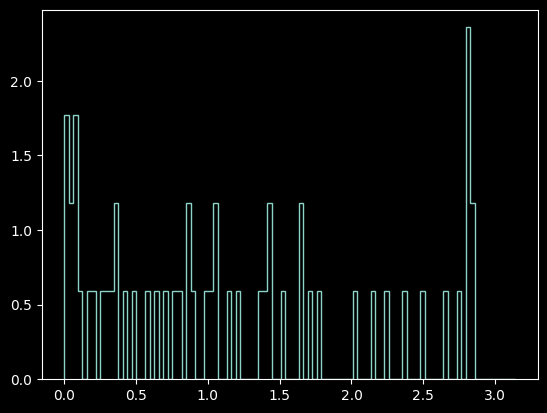

In [ ]:
plt.figure()
plt.hist(phaseRatio.flatten(), bins=100, range=[0,3.14], density=True, histtype='step')
plt.show()